In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import geoplot
from shapely.geometry import Polygon
import h3
import h3pandas
import folium

We load in the prepared data set

In [3]:
file_path = "./data/"

bikesharing = pd.read_csv(f"{file_path}chicago_2017_prepared.csv", infer_datetime_format=True)

In [4]:
bikesharing

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,1,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828949,2017-12-31 23:21:00,2017-12-31 23:23:00,226,117,Racine Ave & Belmont Ave,Wilton Ave & Belmont Ave,2562,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.939743,-87.658865,41.940180,-87.653040
3828950,2017-12-31 23:34:00,2017-12-31 23:39:00,337,182,Clark St & Chicago Ave,Wells St & Elm St,6351,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.896544,-87.630931,41.903222,-87.634324
3828951,2017-12-31 23:41:00,2017-12-31 23:51:00,93,343,Sheffield Ave & Willow St,Racine Ave & Wrightwood Ave,5840,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.913688,-87.652855,41.928887,-87.658971
3828952,2017-12-31 23:42:00,2017-12-31 23:47:00,240,245,Sheridan Rd & Irving Park Rd,Clarendon Ave & Junior Ter,5353,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.954245,-87.654406,41.961004,-87.649603


In [5]:
chicago_geojson = gpd.read_file(f"{file_path}Chicago.geojson")

In [6]:
chicago_geojson

,pri_neigh,sec_neigh,shape_area,shape_len,geometry
0,Grand Boulevard,BRONZEVILLE,48492503.1554,28196.837157,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
1,Printers Row,PRINTERS ROW,2162137.97139,6864.247156,"MULTIPOLYGON (((-87.62761 41.87437, -87.62760 ..."
2,United Center,UNITED CENTER,32520512.7053,23101.363745,"MULTIPOLYGON (((-87.66707 41.88885, -87.66707 ..."
3,Sheffield & DePaul,SHEFFIELD & DEPAUL,10482592.2987,13227.049745,"MULTIPOLYGON (((-87.65833 41.92166, -87.65835 ..."
4,Humboldt Park,HUMBOLDT PARK,125010425.593,46126.751351,"MULTIPOLYGON (((-87.74060 41.88782, -87.74060 ..."
...,...,...,...,...,...
93,Belmont Cragin,"BELMONT CRAGIN,HERMOSA",109099407.211,43311.706886,"MULTIPOLYGON (((-87.74143 41.91698, -87.74141 ..."
94,Austin,AUSTIN,170037750.826,55473.345911,"MULTIPOLYGON (((-87.75620 41.91547, -87.75588 ..."
95,Gold Coast,GOLD COAST,7165705.53467,13685.479377,"MULTIPOLYGON (((-87.62646 41.91147, -87.62640 ..."
96,Boystown,BOYSTOWN,3365778.97115,9780.268985,"MULTIPOLYGON (((-87.64878 41.93999, -87.64927 ..."


<GeoAxesSubplot: >

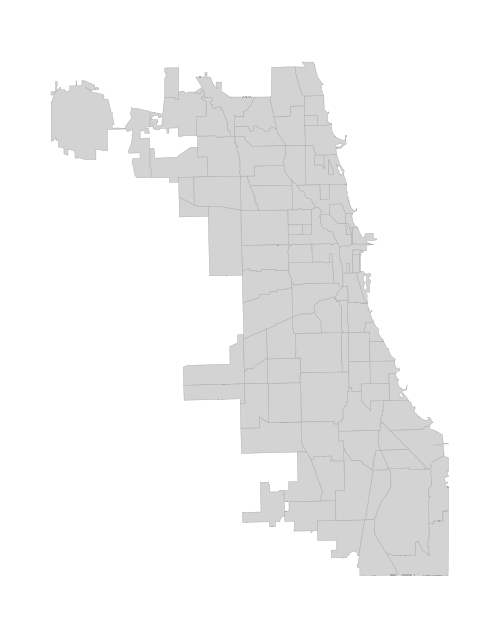

In [7]:
geoplot.polyplot(chicago_geojson, projection=geoplot.crs.AlbersEqualArea(), edgecolor='darkgrey', facecolor='lightgrey', linewidth=.3,
    figsize=(12, 8))

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=chicago_geojson,
    name="choropleth",
    fill_color="YlGnBu",
    fill_opacity=0.3,
    line_opacity=0.2,
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

In [9]:
bikesharing_gdf = gpd.GeoDataFrame(
    bikesharing, geometry=gpd.points_from_xy(bikesharing.start_long, bikesharing.start_lat), crs=4326)

In [10]:
bikesharing_gdf

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,start_month,start_weekday,max_temp,min_temp,precip,start_lat,start_long,end_lat,end_long,geometry
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,1,6,-0.6,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525,POINT (-87.63947 41.87026)
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106,POINT (-87.64332 41.91468)
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252,POINT (-87.63754 41.89820)
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795,POINT (-87.63518 41.88032)
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,1,6,-0.6,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677,POINT (-87.64409 41.93773)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828949,2017-12-31 23:21:00,2017-12-31 23:23:00,226,117,Racine Ave & Belmont Ave,Wilton Ave & Belmont Ave,2562,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.939743,-87.658865,41.940180,-87.653040,POINT (-87.65887 41.93974)
3828950,2017-12-31 23:34:00,2017-12-31 23:39:00,337,182,Clark St & Chicago Ave,Wells St & Elm St,6351,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.896544,-87.630931,41.903222,-87.634324,POINT (-87.63093 41.89654)
3828951,2017-12-31 23:41:00,2017-12-31 23:51:00,93,343,Sheffield Ave & Willow St,Racine Ave & Wrightwood Ave,5840,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.913688,-87.652855,41.928887,-87.658971,POINT (-87.65286 41.91369)
3828952,2017-12-31 23:42:00,2017-12-31 23:47:00,240,245,Sheridan Rd & Irving Park Rd,Clarendon Ave & Junior Ter,5353,Subscriber,23,31,12,6,-12.8,-12.8,0.0,41.954245,-87.654406,41.961004,-87.649603,POINT (-87.65441 41.95425)


In [11]:
bikesharing_gdf_joined = gpd.sjoin(bikesharing_gdf, chicago_geojson, how='right', predicate='within')

In [12]:
bikesharing_gdf_count = bikesharing_gdf_joined[["index_left", "pri_neigh"]].groupby("pri_neigh").count().reset_index()
bikesharing_gdf_count.rename(columns={"index_left": "count"}, inplace=True)
bikesharing_gdf_count

,pri_neigh,count
0,Albany Park,5597
1,Andersonville,6742
2,Archer Heights,0
3,Armour Square,6269
4,Ashburn,0
...,...,...
93,West Ridge,5088
94,West Town,113372
95,Wicker Park,90691
96,Woodlawn,6815


In [13]:
bikesharing_gdf_total = pd.merge(bikesharing_gdf_count, chicago_geojson, on="pri_neigh", how='left')
bikesharing_gdf_total = gpd.GeoDataFrame(bikesharing_gdf_total, geometry="geometry")

In [14]:
bikesharing_gdf_total.head(10)

,pri_neigh,count,sec_neigh,shape_area,shape_len,geometry
0,Albany Park,5597,"NORTH PARK,ALBANY PARK",53542230.819,39339.016439,"MULTIPOLYGON (((-87.70404 41.97355, -87.70403 ..."
1,Andersonville,6742,ANDERSONVILLE,9584592.89906,12534.092625,"MULTIPOLYGON (((-87.66114 41.97630, -87.66132 ..."
2,Archer Heights,0,"ARCHER HEIGHTS,WEST ELSDON",55922505.7212,31880.02103,"MULTIPOLYGON (((-87.71437 41.82604, -87.71436 ..."
3,Armour Square,6269,"ARMOUR SQUARE,CHINATOWN",17141468.6356,24359.189625,"MULTIPOLYGON (((-87.62920 41.84713, -87.62919 ..."
4,Ashburn,0,ASHBURN,135460337.208,54818.154632,"MULTIPOLYGON (((-87.71255 41.75734, -87.71252 ..."
5,Auburn Gresham,0,AUBURN GRESHAM,105065353.602,46757.721716,"MULTIPOLYGON (((-87.63990 41.75615, -87.63990 ..."
6,Austin,1317,AUSTIN,170037750.826,55473.345911,"MULTIPOLYGON (((-87.75620 41.91547, -87.75588 ..."
7,Avalon Park,146,"AVALON PARK,CALUMET HEIGHTS",34852737.7366,27630.822534,"MULTIPOLYGON (((-87.58566 41.75150, -87.58475 ..."
8,Avondale,7355,"IRVING PARK,AVONDALE",55290595.482,34261.933404,"MULTIPOLYGON (((-87.68799 41.93610, -87.68798 ..."
9,Belmont Cragin,0,"BELMONT CRAGIN,HERMOSA",109099407.211,43311.706886,"MULTIPOLYGON (((-87.74143 41.91698, -87.74141 ..."


<AxesSubplot: >

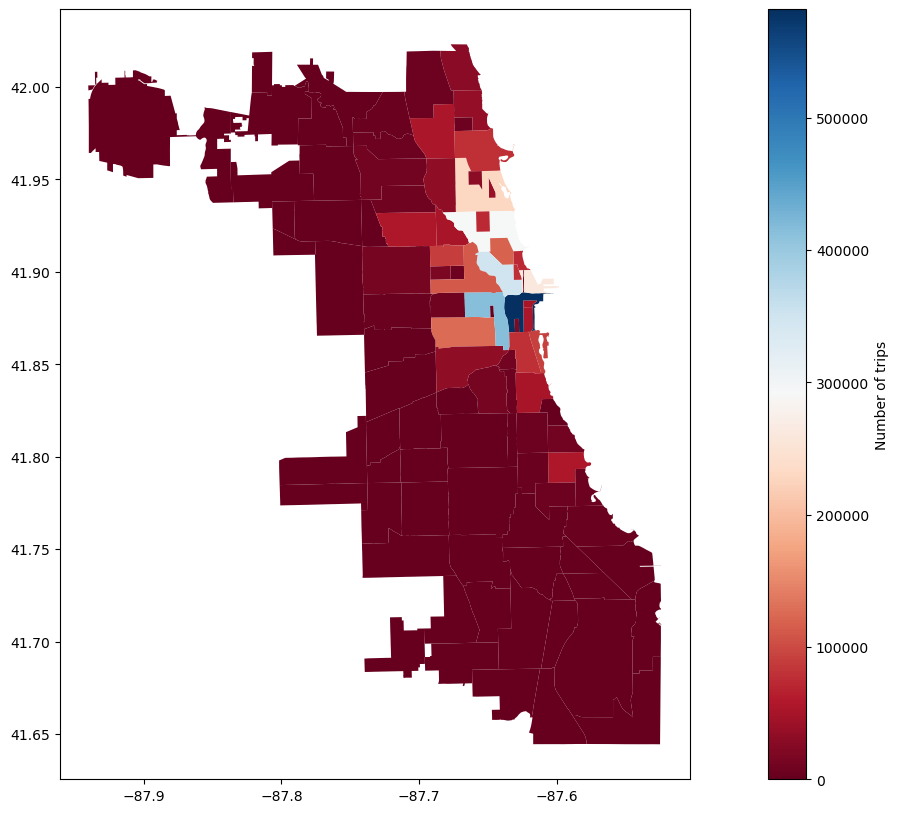

In [15]:
bikesharing_gdf_total.plot( column = 'count',
                      legend = True, 
                      figsize = [20,10],
                      cmap='RdBu',
                      legend_kwds = {'label': "Number of trips"})

In [ ]:
geo_chicago = gpd.GeoSeries(bikesharing_gdf_total['geometry']).to_json()
bikesharing_gdf_total["index"] = bikesharing_gdf_total.index

c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=geo_chicago,
    name="choropleth",
    data=bikesharing_gdf_total,
    columns=["index", "count"],
    key_on="feature.id",
    fill_color="RdBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

In [17]:
bikesharing_gdf_total["count_log10"] = bikesharing_gdf_total['count'].apply(lambda x: np.log10(x) if x > 0 else 0)
bikesharing_gdf_total

,pri_neigh,count,sec_neigh,shape_area,shape_len,geometry,index,count_log10
0,Albany Park,5597,"NORTH PARK,ALBANY PARK",53542230.819,39339.016439,"MULTIPOLYGON (((-87.70404 41.97355, -87.70403 ...",0,3.747955
1,Andersonville,6742,ANDERSONVILLE,9584592.89906,12534.092625,"MULTIPOLYGON (((-87.66114 41.97630, -87.66132 ...",1,3.828789
2,Archer Heights,0,"ARCHER HEIGHTS,WEST ELSDON",55922505.7212,31880.02103,"MULTIPOLYGON (((-87.71437 41.82604, -87.71436 ...",2,0.000000
3,Armour Square,6269,"ARMOUR SQUARE,CHINATOWN",17141468.6356,24359.189625,"MULTIPOLYGON (((-87.62920 41.84713, -87.62919 ...",3,3.797198
4,Ashburn,0,ASHBURN,135460337.208,54818.154632,"MULTIPOLYGON (((-87.71255 41.75734, -87.71252 ...",4,0.000000
...,...,...,...,...,...,...,...,...
93,West Ridge,5088,WEST RIDGE,98429094.8621,43020.689458,"MULTIPOLYGON (((-87.68465 42.01948, -87.68464 ...",93,3.706547
94,West Town,113372,"WICKER PARK,WEST TOWN",58507728.4211,46673.620546,"MULTIPOLYGON (((-87.65686 41.91078, -87.65685 ...",94,5.054506
95,Wicker Park,90691,"WICKER PARK,WEST TOWN",26853193.0926,21992.660946,"MULTIPOLYGON (((-87.66780 41.91430, -87.66780 ...",95,4.957564
96,Woodlawn,6815,WOODLAWN,40515739.083,28960.059037,"MULTIPOLYGON (((-87.58630 41.77334, -87.58664 ...",96,3.833466


In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=geo_chicago,
    name="choropleth",
    data=bikesharing_gdf_total,
    columns=["index", "count_log10"],
    key_on="feature.id",
    fill_color="RdBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of trips (Log10)",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

<AxesSubplot: xlabel='pri_neigh', ylabel='count'>

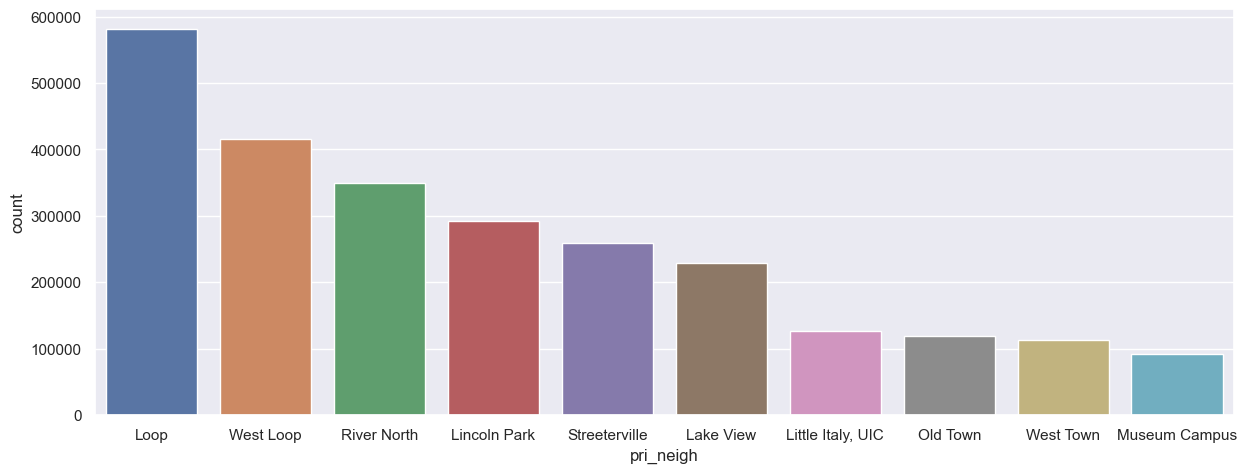

In [19]:
sns.set(rc={'figure.figsize':(14.7,5.27)})
sns.barplot(data=bikesharing_gdf_total.nlargest(10, "count"), x="pri_neigh", y="count")

In [20]:
(bikesharing_gdf_total.nlargest(5, "count")["count"].sum()/bikesharing_gdf_total["count"].sum()) * 100

49.943944861314165

In [21]:
(bikesharing_gdf_total.nlargest(10, "count")["count"].sum()/bikesharing_gdf_total["count"].sum()) * 100

67.8343198441504

In [22]:
bikesharing_gdf["h3_7"] = bikesharing_gdf["geometry"].apply(lambda x: h3.geo_to_h3(x.y, x.x, resolution=7))
bikesharing_gdf["h3_8"] = bikesharing_gdf["geometry"].apply(lambda x: h3.geo_to_h3(x.y, x.x, resolution=8))
bikesharing_gdf["h3_9"] = bikesharing_gdf["geometry"].apply(lambda x: h3.geo_to_h3(x.y, x.x, resolution=9))
bikesharing_gdf

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,...,min_temp,precip,start_lat,start_long,end_lat,end_long,geometry,h3_7,h3_8,h3_9
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,...,-0.6,0.0,41.870257,-87.639474,41.880884,-87.639525,POINT (-87.63947 41.87026),872664c1affffff,882664c1a7fffff,892664c1a73ffff
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,...,-0.6,0.0,41.914680,-87.643320,41.910522,-87.653106,POINT (-87.64332 41.91468),872664c13ffffff,882664c139fffff,892664c138fffff
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,...,-0.6,0.0,41.898203,-87.637536,41.907066,-87.667252,POINT (-87.63754 41.89820),872664c1effffff,882664c1e5fffff,892664c1e53ffff
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,...,-0.6,0.0,41.880317,-87.635185,41.875885,-87.640795,POINT (-87.63518 41.88032),872664c1affffff,882664c1adfffff,892664c1ac7ffff
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,...,-0.6,0.0,41.937725,-87.644095,41.911386,-87.638677,POINT (-87.64409 41.93773),872664c10ffffff,882664c10dfffff,892664c10cfffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828949,2017-12-31 23:21:00,2017-12-31 23:23:00,226,117,Racine Ave & Belmont Ave,Wilton Ave & Belmont Ave,2562,Subscriber,23,31,...,-12.8,0.0,41.939743,-87.658865,41.940180,-87.653040,POINT (-87.65887 41.93974),872664c16ffffff,882664c163fffff,892664c162bffff
3828950,2017-12-31 23:34:00,2017-12-31 23:39:00,337,182,Clark St & Chicago Ave,Wells St & Elm St,6351,Subscriber,23,31,...,-12.8,0.0,41.896544,-87.630931,41.903222,-87.634324,POINT (-87.63093 41.89654),872664c1effffff,882664c1e1fffff,892664c1e1bffff
3828951,2017-12-31 23:41:00,2017-12-31 23:51:00,93,343,Sheffield Ave & Willow St,Racine Ave & Wrightwood Ave,5840,Subscriber,23,31,...,-12.8,0.0,41.913688,-87.652855,41.928887,-87.658971,POINT (-87.65286 41.91369),872664c13ffffff,882664c135fffff,892664c1357ffff
3828952,2017-12-31 23:42:00,2017-12-31 23:47:00,240,245,Sheridan Rd & Irving Park Rd,Clarendon Ave & Junior Ter,5353,Subscriber,23,31,...,-12.8,0.0,41.954245,-87.654406,41.961004,-87.649603,POINT (-87.65441 41.95425),872664c16ffffff,882664c169fffff,892664c1683ffff


In [23]:
bikesharing_gdf["geometry_end"] = gpd.points_from_xy(bikesharing.end_long, bikesharing.end_lat)
bikesharing_gdf["h3_8_end"] = bikesharing_gdf["geometry_end"].apply(lambda x: h3.geo_to_h3(x.y, x.x, resolution=8))

In [24]:
bikesharing_gdf

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,start_day,...,start_lat,start_long,end_lat,end_long,geometry,h3_7,h3_8,h3_9,geometry_end,h3_8_end
0,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0,1,...,41.870257,-87.639474,41.880884,-87.639525,POINT (-87.63947 41.87026),872664c1affffff,882664c1a7fffff,892664c1a73ffff,POINT (-87.63953 41.88088),882664c1adfffff
1,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0,1,...,41.914680,-87.643320,41.910522,-87.653106,POINT (-87.64332 41.91468),872664c13ffffff,882664c139fffff,892664c138fffff,POINT (-87.65311 41.91052),882664c131fffff
2,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0,1,...,41.898203,-87.637536,41.907066,-87.667252,POINT (-87.63754 41.89820),872664c1effffff,882664c1e5fffff,892664c1e53ffff,POINT (-87.66725 41.90707),882664cacbfffff
3,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0,1,...,41.880317,-87.635185,41.875885,-87.640795,POINT (-87.63518 41.88032),872664c1affffff,882664c1adfffff,892664c1ac7ffff,POINT (-87.64079 41.87588),882664c1a5fffff
4,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0,1,...,41.937725,-87.644095,41.911386,-87.638677,POINT (-87.64409 41.93773),872664c10ffffff,882664c10dfffff,892664c10cfffff,POINT (-87.63868 41.91139),882664c13bfffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828949,2017-12-31 23:21:00,2017-12-31 23:23:00,226,117,Racine Ave & Belmont Ave,Wilton Ave & Belmont Ave,2562,Subscriber,23,31,...,41.939743,-87.658865,41.940180,-87.653040,POINT (-87.65887 41.93974),872664c16ffffff,882664c163fffff,892664c162bffff,POINT (-87.65304 41.94018),882664c163fffff
3828950,2017-12-31 23:34:00,2017-12-31 23:39:00,337,182,Clark St & Chicago Ave,Wells St & Elm St,6351,Subscriber,23,31,...,41.896544,-87.630931,41.903222,-87.634324,POINT (-87.63093 41.89654),872664c1effffff,882664c1e1fffff,892664c1e1bffff,POINT (-87.63432 41.90322),882664c1edfffff
3828951,2017-12-31 23:41:00,2017-12-31 23:51:00,93,343,Sheffield Ave & Willow St,Racine Ave & Wrightwood Ave,5840,Subscriber,23,31,...,41.913688,-87.652855,41.928887,-87.658971,POINT (-87.65286 41.91369),872664c13ffffff,882664c135fffff,892664c1357ffff,POINT (-87.65897 41.92889),882664c12bfffff
3828952,2017-12-31 23:42:00,2017-12-31 23:47:00,240,245,Sheridan Rd & Irving Park Rd,Clarendon Ave & Junior Ter,5353,Subscriber,23,31,...,41.954245,-87.654406,41.961004,-87.649603,POINT (-87.65441 41.95425),872664c16ffffff,882664c169fffff,892664c1683ffff,POINT (-87.64960 41.96100),882664d893fffff


In [25]:
h3_data_7 = bikesharing_gdf.groupby("h3_7").count()
h3_geo_7 = pd.DataFrame(h3_data_7).h3.h3_to_geo_boundary()
h3_geo_7["index"] = h3_geo_7.reset_index().index
h3_geo_7.rename(columns={"start_time" : "count"}, inplace=True)

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_7,
    name="choropleth",
    fill_color="RdBu",
    fill_opacity=0.4,
    line_opacity=0.2,
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

<AxesSubplot: >

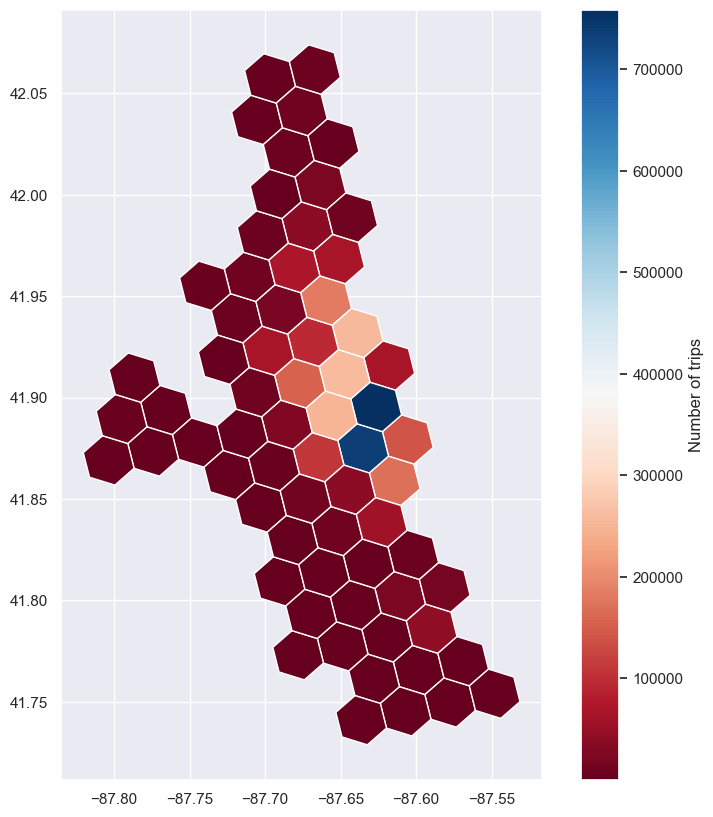

In [27]:
h3_geo_7.plot(legend=True, column='count', figsize=(10, 10), cmap='RdBu', legend_kwds = {'label': "Number of trips"})

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_7.reset_index(),
    name="choropleth",
    data=h3_geo_7.reset_index(),
    columns=["index", "count"],
    key_on="feature.id",
    fill_color="RdBu",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

<AxesSubplot: >

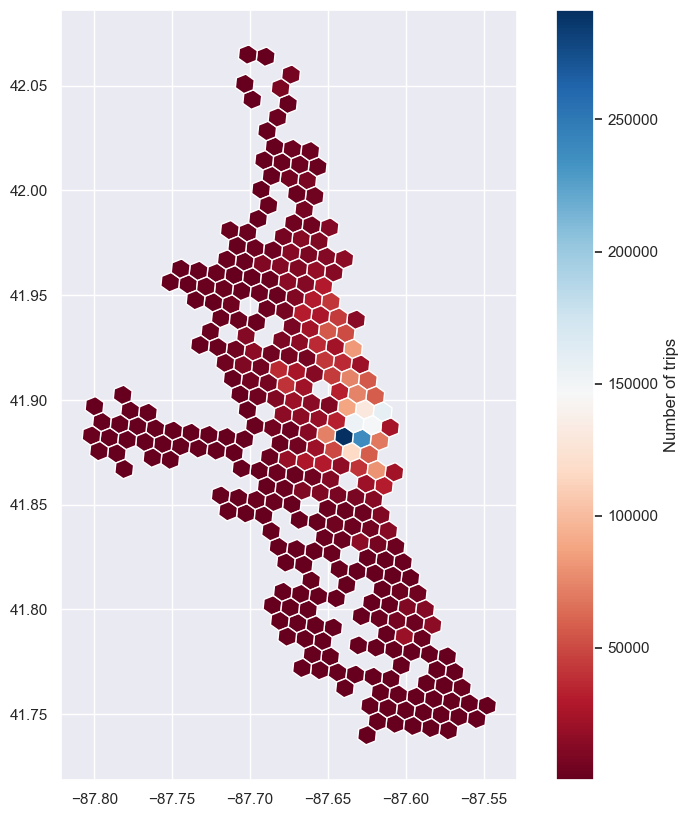

In [29]:
h3_data_8 = bikesharing_gdf.groupby("h3_8").count()
h3_data_8_end = bikesharing_gdf.groupby("h3_8_end").count()
h3_data_8["balance"] = h3_data_8["start_time"] - h3_data_8_end["start_time"]
h3_geo_8 = pd.DataFrame(h3_data_8).h3.h3_to_geo_boundary()
h3_geo_8["index"] = h3_geo_8.reset_index().index
h3_geo_8.rename(columns={"start_time" : "count"}, inplace=True)
h3_geo_8.plot(legend=True, column='count', figsize=(10, 10), cmap='RdBu', legend_kwds = {'label': "Number of trips"})

<AxesSubplot: >

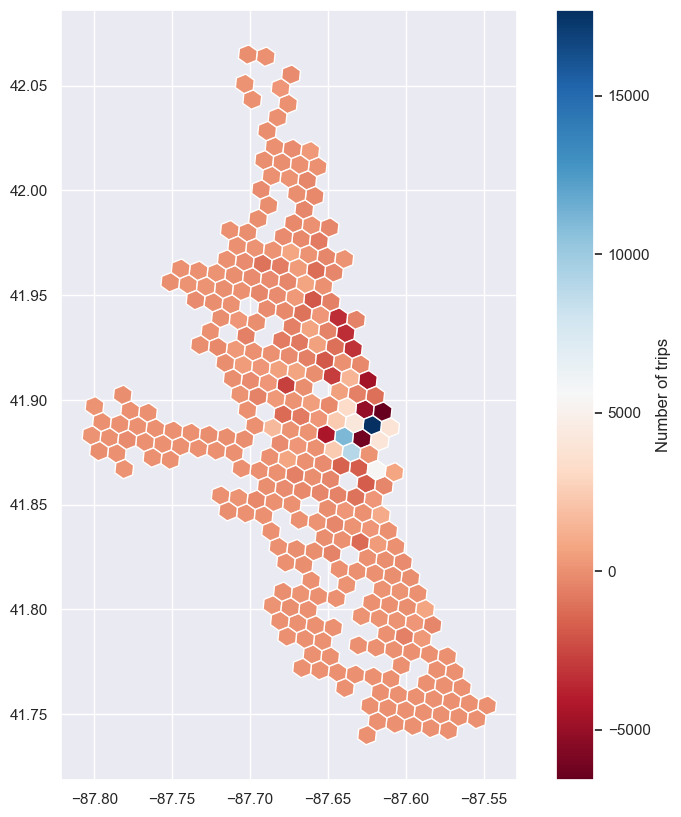

In [30]:
h3_geo_8.plot(legend=True, column='balance', figsize=(10, 10), cmap='RdBu', legend_kwds = {'label': "Number of trips"})

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_8.reset_index(),
    name="choropleth",
    data=h3_geo_8.reset_index(),
    columns=["index", "count"],
    key_on="feature.id",
    fill_color="RdBu",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

<AxesSubplot: >

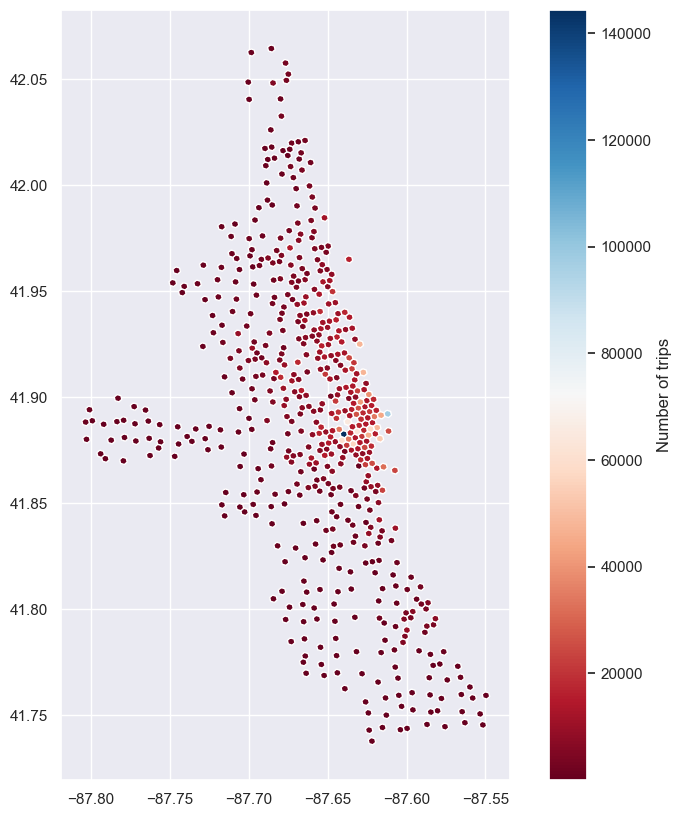

In [32]:
h3_data_9 = bikesharing_gdf.groupby("h3_9").count()
h3_geo_9 = pd.DataFrame(h3_data_9).h3.h3_to_geo_boundary()
h3_geo_9["index"] = h3_geo_9.reset_index().index
h3_geo_9.rename(columns={"start_time" : "count"}, inplace=True)
h3_geo_9.plot(legend=True, column='count', figsize=(10, 10), cmap='RdBu', legend_kwds = {'label': "Number of trips"})

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_9.reset_index(),
    name="choropleth",
    data=h3_geo_9.reset_index(),
    columns=["index", "count"],
    key_on="feature.id",
    fill_color="RdBu",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

In [34]:
h3_data_8.rename(columns={"start_time" : "count"}, inplace=True)
(h3_data_8.nlargest(10, "count")["count"].sum()/h3_data_8["count"].sum()) * 100

38.865627531696646

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_8.reset_index().nlargest(10, "count"),
    name="choropleth",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

In [36]:
(h3_data_8.nlargest(20, "count")["count"].sum()/h3_data_8["count"].sum()) * 100

54.91525884092627

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_8.reset_index().nlargest(20, "count"),
    name="choropleth",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

In [38]:
(h3_data_8.nlargest(30, "count")["count"].sum()/h3_data_8["count"].sum()) * 100

65.18302387545005

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_8.reset_index().nlargest(30, "count"),
    name="choropleth",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

In [40]:
(h3_data_8.nlargest(50, "count")["count"].sum()/h3_data_8["count"].sum()) * 100

78.37351924311444

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_8.reset_index().nlargest(50, "count"),
    name="choropleth",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

In [42]:
(h3_data_8.nlargest(100, "count")["count"].sum()/h3_data_8["count"].sum()) * 100

93.50671227703441

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)

folium.Choropleth(
    geo_data=h3_geo_8.reset_index().nlargest(100, "count"),
    name="choropleth",
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map

In [ ]:
c_map = folium.Map(location=[41.863, -87.5], zoom_start=10)
data=h3_geo_8["mark"] = 0
data=h3_geo_8.nlargest(100, "count")["mark"] = 1

folium.Choropleth(
    geo_data=h3_geo_8.reset_index().nlargest(300, "count"),
    name="choropleth",
    data=h3_geo_8.reset_index().nlargest(100, "count"),
    columns=["index", "mark"],
    key_on="feature.id",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of trips",
).add_to(c_map)

folium.LayerControl().add_to(c_map)

c_map